In [7]:
import pandas as pd
import numpy as np

df = pd.read_csv("final_ml_dataset.csv")  # or whatever you named it
df.head()


,quarter,eps,revenue,pat_margin,ebitda,ebitda_margin,pat,company,ret_1m,ret_3m,vol_30d,vol_60d,abnormal_volume
0,2017Q2,2.80,3598.12,4.86,326.05,9.06,174.77,AVENUE,0.093874,0.297413,0.013936,0.025774,0.711724
1,2017Q3,3.06,3506.92,5.45,339.14,9.67,191.04,AVENUE,0.037171,0.323089,0.026681,0.022271,2.377819
2,2017Q4,4.03,4093.89,6.15,435.40,10.64,251.77,AVENUE,0.049576,0.131616,0.012112,0.019751,0.816669
3,2018Q1,2.68,3809.96,4.39,309.38,8.12,167.10,AVENUE,0.026022,0.151850,0.021122,0.019811,0.786405
4,2018Q2,4.02,4559.42,5.50,436.93,9.58,250.61,AVENUE,-0.055179,0.094379,0.024817,0.020871,0.281471


In [8]:
df = df.sort_values(["company", "quarter"]).reset_index(drop=True)

df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   quarter          712 non-null    object 
 1   eps              712 non-null    float64
 2   revenue          712 non-null    float64
 3   pat_margin       712 non-null    float64
 4   ebitda           712 non-null    float64
 5   ebitda_margin    712 non-null    float64
 6   pat              712 non-null    float64
 7   company          712 non-null    object 
 8   ret_1m           712 non-null    float64
 9   ret_3m           712 non-null    float64
 10  vol_30d          712 non-null    float64
 11  vol_60d          712 non-null    float64
 12  abnormal_volume  712 non-null    float64
dtypes: float64(11), object(2)
memory usage: 72.4+ KB


,eps,revenue,pat_margin,ebitda,ebitda_margin,pat,ret_1m,ret_3m,vol_30d,vol_60d,abnormal_volume
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,9.423146,3168.548483,9.412879,742.693722,17.257654,490.567219,0.014942,0.056564,0.016662,0.017144,1.001574
std,23.944304,3828.232778,24.561575,1286.280358,25.380557,897.393824,0.078916,0.148368,0.006831,0.005592,0.434065
min,-35.460000,0.060000,-250.000000,-466.210000,-265.380000,-700.910000,-0.342987,-0.444436,0.005860,0.007158,0.120595
25%,1.997500,881.797500,6.960000,162.350000,12.552500,84.270000,-0.029283,-0.045549,0.012123,0.013036,0.717040
50%,3.290000,1557.335000,11.200000,321.590000,19.905000,203.445000,0.013534,0.050927,0.015407,0.016316,0.944919
75%,6.895000,3472.905000,17.162500,582.052500,25.970000,390.995000,0.058907,0.144642,0.019387,0.019972,1.175538
max,185.620000,18476.610000,96.700000,7659.850000,99.320000,5638.250000,0.315835,0.624750,0.062029,0.049429,5.117758


In [9]:
df["eps_lag4"] = df.groupby("company")["eps"].shift(4)


In [10]:
df["raw_surprise"] = df["eps"] - df["eps_lag4"]
df["scaled_surprise"] = df["raw_surprise"] / df["eps_lag4"].abs()


In [11]:
upper = df["scaled_surprise"].quantile(0.7)
lower = df["scaled_surprise"].quantile(0.3)

df["surprise_q"] = np.nan
df.loc[df["scaled_surprise"] >= upper, "surprise_q"] = 1
df.loc[df["scaled_surprise"] <= lower, "surprise_q"] = 0


In [12]:
df["surprise_q"].value_counts()


surprise_q
1.0    190
0.0    190
Name: count, dtype: int64

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns


In [14]:
df[numeric_cols].corr()["scaled_surprise"].sort_values(ascending=False)


scaled_surprise    1.000000
pat_margin         0.165608
ebitda_margin      0.151629
surprise_q         0.086828
ret_3m             0.057804
raw_surprise       0.049380
ret_1m             0.045976
vol_60d            0.038463
vol_30d            0.037375
eps                0.005448
pat               -0.020505
eps_lag4          -0.021151
ebitda            -0.023059
revenue           -0.034345
abnormal_volume   -0.046765
Name: scaled_surprise, dtype: float64

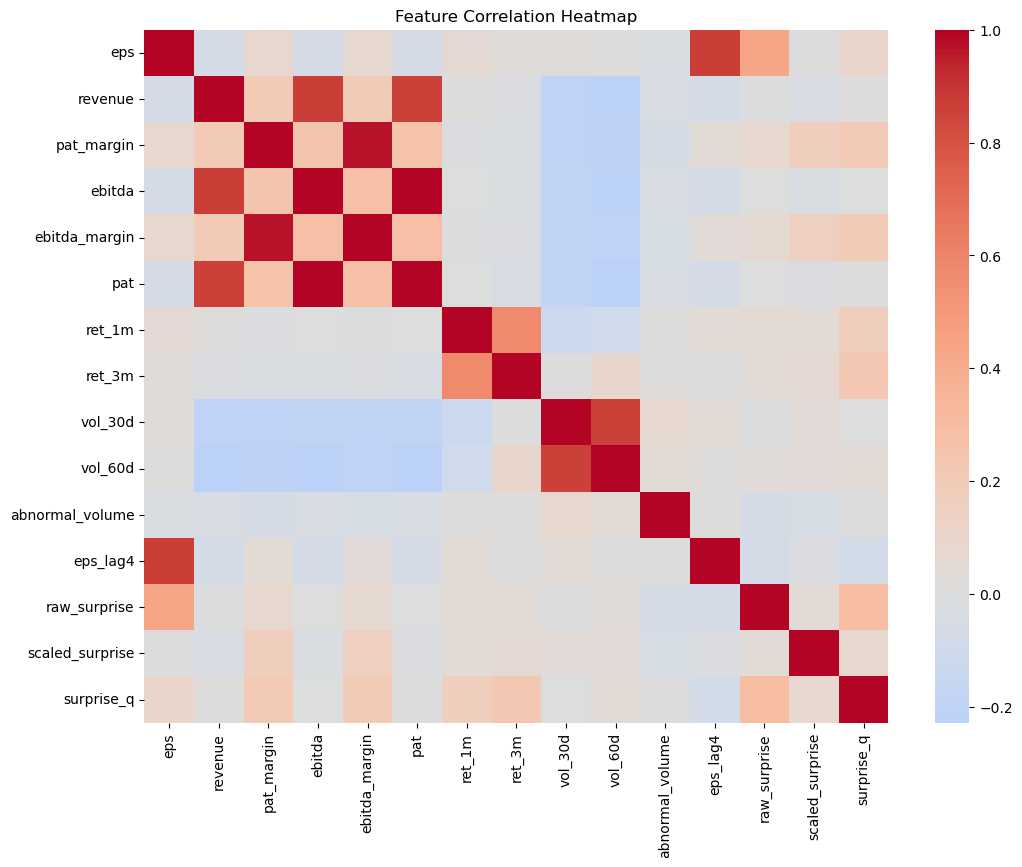

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.heatmap(df[numeric_cols].corr(), cmap="coolwarm", center=0)
plt.title("Feature Correlation Heatmap")
plt.show()


In [16]:
signal_features = [
    "pat_margin",
    "ebitda_margin",
    "ret_1m",
    "ret_3m",
    "vol_30d",
    "vol_60d",
    "abnormal_volume",
    # add engineered features once created
]

df[signal_features + ["scaled_surprise"]].corr()["scaled_surprise"].sort_values(ascending=False)


scaled_surprise    1.000000
pat_margin         0.165608
ebitda_margin      0.151629
ret_3m             0.057804
ret_1m             0.045976
vol_60d            0.038463
vol_30d            0.037375
abnormal_volume   -0.046765
Name: scaled_surprise, dtype: float64